In [21]:
pip install matplotlib seaborn pandas numpy

Note: you may need to restart the kernel to use updated packages.


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
#Estilo gráficas 
sns.set(style="darkgrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [29]:
# Carga de datos utilizando traducciones
train = pd.read_csv('sales_train.csv')
items = pd.read_csv('items_en.csv') 
cats = pd.read_csv('item_categories_en.csv')
shops = pd.read_csv('shops_en.csv')

print("filas y columnas train",train.shape)

filas y columnas train (2935849, 6)


In [ ]:
# Revisión de contenido 

print("Contenido TRAIN")
print("Columnas:", train.columns.tolist())
print(train.head(), "\n")

print("Contenido ITEMS")
print("Columnas:", items.columns.tolist())
print(items.head(), "\n")

print("Contenido CATS")
print("Columnas:", cats.columns.tolist())
print(cats.head(), "\n")

print("Contenido SHOP")
print("Columnas:", shops.columns.tolist())
print(shops.head(), "\n")

Contenido TRAIN
Columnas: ['date', 'date_block_num', 'shop_id', 'item_id', 'item_price', 'item_cnt_day']
         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0 

Contenido ITEMS
Columnas: ['item_name', 'item_id', 'item_category_id']
                                           item_name  item_id  \
0                       ! POWER IN glamor (PLAST.) D        0   
1  ! ABBYY FineReader 12 Professional Edition Ful...        1   
2                           *** In the glory (UNV) D        2   
3                             *** BLUE WAVE (Univ) D        3   
4                                  *** BOX (GLASS) D 

In [ ]:
# Uniones con tablas de traducciones
# train + items
train = pd.merge(train, items, on='item_id', how='left')

# train + categorías
train = pd.merge(train, cats, on='item_category_id', how='left')

# # train + shop
train = pd.merge(train, shops, on='shop_id', how='left')

# Formato fecha
train['date'] = pd.to_datetime(train['date'], format='%d.%m.%Y')


filas y columnas train (2935849, 10)


In [31]:
# Verificación
print("filas y columnas train",train.shape)
train.head()

filas y columnas train (2935849, 10)


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
0,2013-01-02,0,59,22154,999.00,1.0,Scene 2012 (BD),37,Movies - Blu-Ray,"Yaroslavl shopping center ""Altair"""
1,2013-01-03,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,Music - Vinyl,"Moscow TRC ""Atrium"""
2,2013-01-05,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,Music - Vinyl,"Moscow TRC ""Atrium"""
3,2013-01-06,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,Music - Vinyl,"Moscow TRC ""Atrium"""
4,2013-01-15,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Music - CD production firm,"Moscow TRC ""Atrium"""


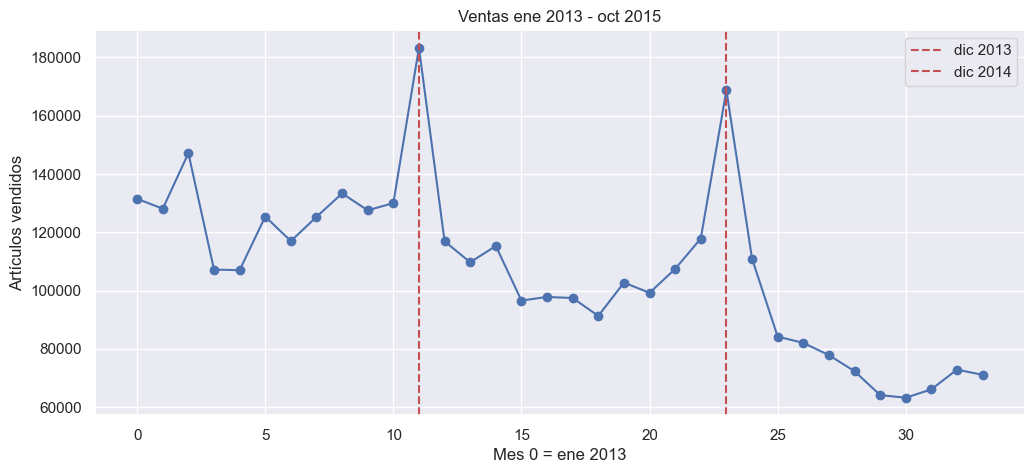

In [34]:
# REVISIÓN INCIAL DE VENTAS

# Agrupar ventas por mes 
monthly_sales = train.groupby('date_block_num')['item_cnt_day'].sum()

# Gráficas 
plt.figure(figsize=(12, 5))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', color='b')
plt.title('Ventas ene 2013 - oct 2015')
plt.xlabel('Mes 0 = ene 2013')
plt.ylabel('Artículos vendidos')
plt.axvline(x=11, color='r', linestyle='--', label='dic 2013') 
plt.axvline(x=23, color='r', linestyle='--', label='dic 2014') 
plt.legend()
plt.show()



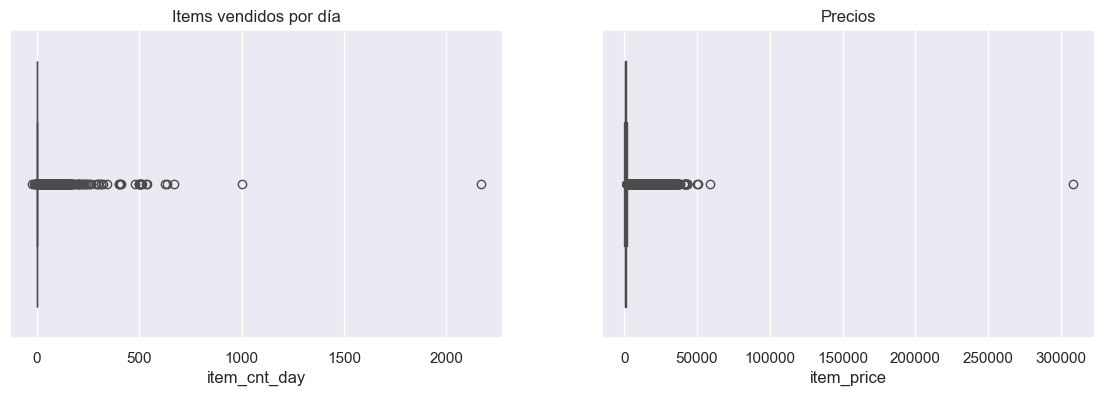

In [ ]:
# REVISIÓN OUTLIERS
# Para número de artículos vendidos y comportamiento de precios
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

sns.boxplot(x=train['item_cnt_day'], ax=ax[0])
ax[0].set_title('Items vendidos por día')

sns.boxplot(x=train['item_price'], ax=ax[1])
ax[1].set_title('Precios')

plt.show()